In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

In [2]:
df=pd.read_csv('data.csv')
df

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P..."
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']"
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']"
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']"
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,The Love Guru,2008,PG-13,1h 27m,3.8,54K,['Marco Schnabel'],"['Mike Myers', 'Graham Gordy']","['Comedy', 'Romance', 'Sport']","['Mike Myers', 'Jessica Alba', 'Romany Malco']"
96,97,The Hungover Games,2014,R,1h 25m,3.5,16K,['Josh Stolberg'],"['Writers', 'Kyle Barnett Anderson', 'David Be...","['Adventure', 'Comedy', 'Fantasy']","['Ben Begley', 'Herbert Russell', 'Ross Nathan']"
97,98,In the Name of the King: A Dungeon Siege Tale,2007,PG-13,2h 7m,3.8,51K,['Uwe Boll'],"['Writers', 'Doug Taylor', 'Jason Rappaport', ...","['Action', 'Adventure', 'Fantasy']","['Jason Statham', 'Ron Perlman', 'Ray Liotta']"
98,99,The Avengers,1998,PG-13,1h 29m,3.8,45K,['Jeremiah S. Chechik'],"['Sydney Newman', 'Don MacPherson']","['Action', 'Adventure', 'Sci-Fi']","['Ralph Fiennes', 'Uma Thurman', 'Sean Connery']"


In [3]:
df.columns

Index(['rank', 'name', 'year', 'certification', 'duration', 'rating',
       'review_count', 'director', 'writer', 'genre', 'stars'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of     rank                                           name  year certification  \
0      1                                 Disaster Movie  2008         PG-13   
1      2                       Manos: The Hands of Fate  1966     Not Rated   
2      3                     Birdemic: Shock and Terror  2010     Not Rated   
3      4                   Superbabies: Baby Geniuses 2  2004            PG   
4      5                        The Hottie & the Nottie  2008         PG-13   
..   ...                                            ...   ...           ...   
95    96                                  The Love Guru  2008         PG-13   
96    97                             The Hungover Games  2014             R   
97    98  In the Name of the King: A Dungeon Siege Tale  2007         PG-13   
98    99                                   The Avengers  1998         PG-13   
99   100             The Flintstones in Viva Rock Vegas  2000            PG   

   duration  rating

In [5]:
df.isna().sum()

rank             0
name             0
year             0
certification    4
duration         4
rating           0
review_count     0
director         0
writer           0
genre            0
stars            0
dtype: int64

In [6]:
df[df.duration.isna()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
36,37,The Cost of Deception,2021,NaN,NaN,1.5,40K,['Keith English'],"['Writer', 'Balázs Bendi', '']","['Action', 'Crime', 'Drama']","['Vivianne Bánovits', 'András Mózes', 'Barna B..."
38,39,Enes Batur: Imagination or Reality?,2018,NaN,NaN,2.0,56K,['Kamil Cetin'],"['Enes Batur', 'Busra Nur Karahan', 'Enver Sül...",['Comedy'],"['Enes Batur', 'Bilal Hanci', 'Atakan Özyurt']"
43,44,Adipurush,2023,NaN,NaN,3.4,131K,['Om Raut'],"['Writers', 'Manoj Muntashir', 'Om Raut', '']","['Action', 'Adventure', 'Drama']","['Kriti Sanon', 'Saif Ali Khan', 'Prabhas']"
71,72,Smolensk,2016,NaN,NaN,1.2,40K,['Antoni Krauze'],"['Writers', 'Antoni Krauze', 'Tomasz Lysiak', ...","['Drama', 'Thriller']","['Beata Fido', 'Maciej Póltorak', 'Aldona Stru..."


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(96, 11)

In [9]:
df.describe()

,rank,year,rating
count,96.000000,96.00000,96.000000
mean,50.604167,2005.03125,2.903125
std,29.469870,11.48954,0.690302
min,1.000000,1964.00000,1.200000
25%,24.750000,2000.00000,2.500000
50%,51.500000,2006.00000,3.100000
75%,76.250000,2012.25000,3.500000
max,100.000000,2023.00000,3.800000


In [10]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 96, dtype: bool>

In [11]:
df.dtypes

rank               int64
name              object
year               int64
certification     object
duration          object
rating           float64
review_count      object
director          object
writer            object
genre             object
stars             object
dtype: object

In [12]:
print(df.year.value_counts())
print()
print(df.year.min())

2007    7
2008    5
2003    5
2005    5
2006    5
2014    4
1997    4
2002    4
2020    4
2004    3
2010    3
2000    3
2009    3
2018    3
2019    3
2011    3
1994    3
2022    2
2013    2
1988    2
1996    2
1990    2
1987    2
1998    2
2012    2
2021    2
1970    1
2017    1
2016    1
2015    1
2023    1
1964    1
1966    1
2001    1
1999    1
1989    1
1983    1
Name: year, dtype: int64

1964


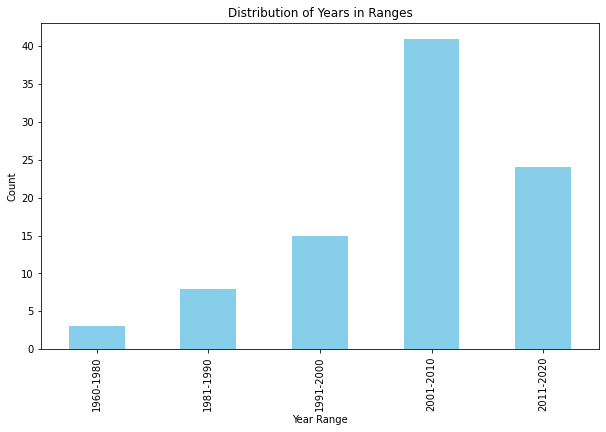

In [13]:
bins = [1960, 1980, 1990, 2000, 2010,2020]

df['year_range'] = pd.cut(df['year'], bins=bins, labels=['1960-1980', '1981-1990', '1991-2000', '2001-2010','2011-2020'])
range_counts = df['year_range'].value_counts()

plt.figure(figsize=(10, 6))
range_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Years in Ranges')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.show()

In [14]:
pd.crosstab(df.year_range,df.certification)

certification,G,Not Rated,PG,PG-13,R,TV-MA
year_range,,,,,,
1960-1980,1,2,0,0,0,0
1981-1990,0,1,3,3,1,0
1991-2000,1,0,6,6,2,0
2001-2010,0,4,8,18,11,0
2011-2020,0,5,6,5,5,3


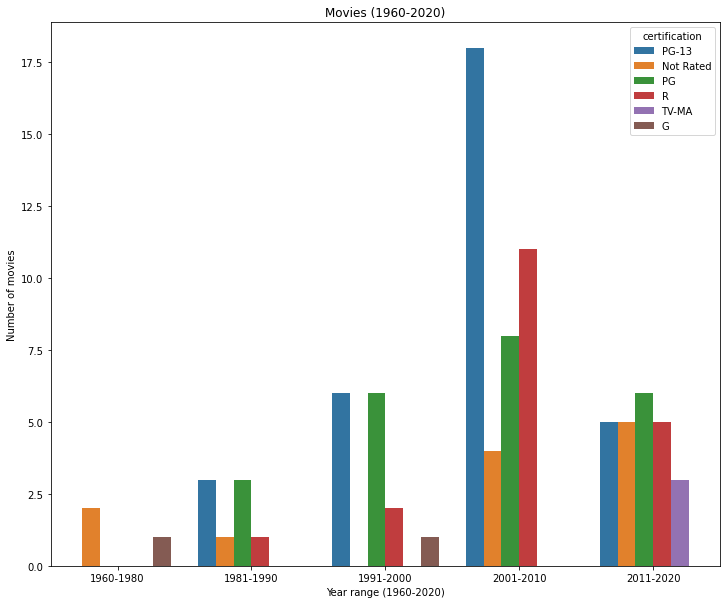

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,x=df.year_range,hue=df.certification)
plt.xlabel('Year range (1960-2020)')
plt.ylabel('Number of movies')
plt.title('Movies (1960-2020)')
plt.show()

([<matplotlib.patches.Wedge at 0x22712828580>,
 [Text(-0.9526279613277876, 0.5499999702695114, 'PG-13'),
  Text(-0.31931309570253763, -1.0526343842535557, 'PG'),
  Text(1.0019502215814473, -0.4539777015150511, 'R'),
  Text(0.8503114660311079, 0.697832652385963, 'Not Rated'),
  Text(0.3193130833831944, 1.0526343879905868, 'TV-MA'),
  Text(0.07194338006359918, 1.0976448196320268, 'G')],
 [Text(-0.5196152516333387, 0.29999998378336984, '33.3%'),
  Text(-0.17417077947411141, -0.5741642095928484, '24.0%'),
  Text(0.5465183026807894, -0.2476242008263915, '21.9%'),
  Text(0.46380625419878607, 0.3806359922105253, '13.5%'),
  Text(0.17417077275446968, 0.5741642116312291, '5.2%'),
  Text(0.0392418436710541, 0.5987153561629236, '2.1%')])

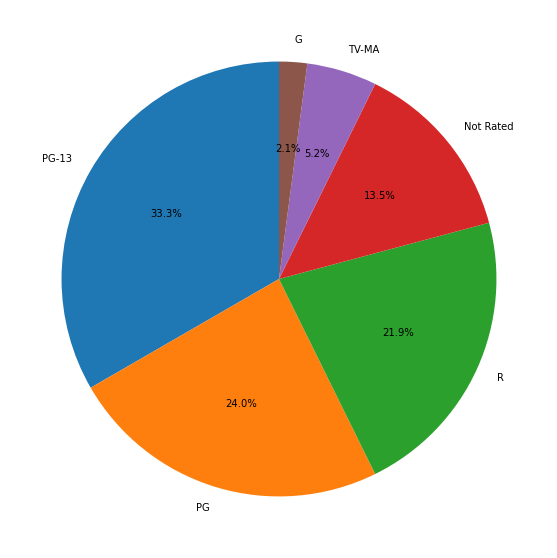

In [16]:
plt.figure(figsize = (12,10))
value_counts = df['certification'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

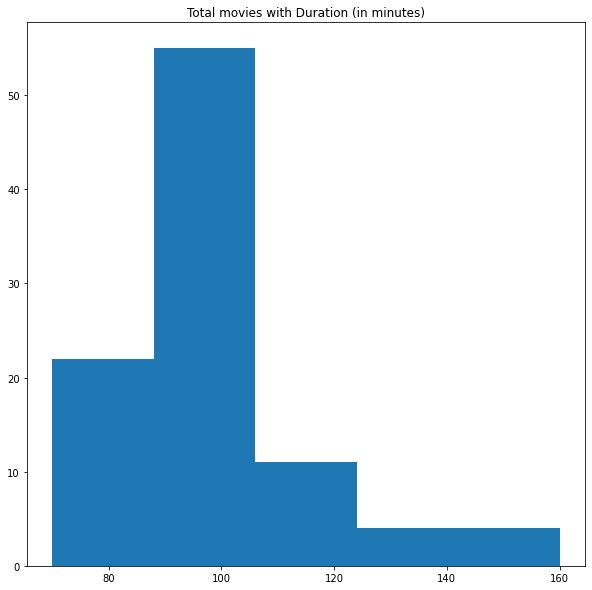

In [17]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[-1].split('m')[0]))
plt.figure(figsize=(10,10))
plt.hist(df.duration_minutes,bins=5)
plt.title('Total movies with Duration (in minutes)')
plt.show()


<AxesSubplot:xlabel='rating', ylabel='Count'>

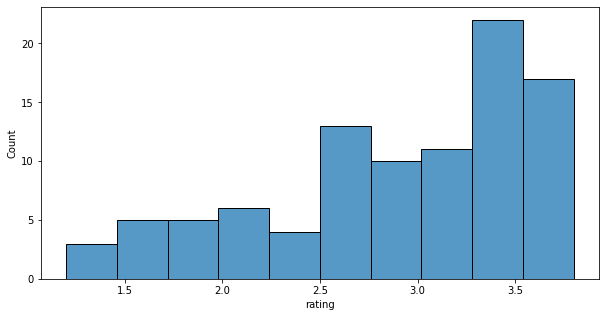

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='rating',bins=10)

In [19]:
print(f'Max rating of movie is {df.rating.max()}')
print(f'Min rating of movie is {df.rating.min()}')


Max rating of movie is 3.8
Min rating of movie is 1.2


# Record that rating is minimum

In [20]:
df[df['rating']==df.rating.min()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
23,24,Daniel the Wizard,2004,Not Rated,1h 21m,1.2,15K,['Ulli Lommel'],['Ulli Lommel'],"['Comedy', 'Crime', 'Fantasy']","['Daniel Küblböck', 'Ulli Lommel', 'Rudolf Wal...",2001-2010,81


# Records that rating is maximum

In [21]:
df[df['rating']==df.rating.max()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
74,75,Batman & Robin,1997,PG-13,2h 5m,3.8,264K,['Joel Schumacher'],"['Bob Kane', 'Akiva Goldsman']","['Action', 'Sci-Fi']","['Arnold Schwarzenegger', 'George Clooney', ""C...",1991-2000,125
85,86,The Wicker Man,2006,PG-13,1h 42m,3.8,71K,['Neil LaBute'],"['Neil LaBute', 'Anthony Shaffer']","['Horror', 'Mystery', 'Thriller']","['Nicolas Cage', 'Ellen Burstyn', 'Leelee Sobi...",2001-2010,102
92,93,Piranha 3DD,2012,R,1h 23m,3.8,45K,['John Gulager'],"['Writers', 'Patrick Melton', 'Marcus Dunstan'...","['Comedy', 'Horror', 'Sci-Fi']","['Danielle Panabaker', 'Ving Rhames', 'David H...",2011-2020,83
95,96,The Love Guru,2008,PG-13,1h 27m,3.8,54K,['Marco Schnabel'],"['Mike Myers', 'Graham Gordy']","['Comedy', 'Romance', 'Sport']","['Mike Myers', 'Jessica Alba', 'Romany Malco']",2001-2010,87
97,98,In the Name of the King: A Dungeon Siege Tale,2007,PG-13,2h 7m,3.8,51K,['Uwe Boll'],"['Writers', 'Doug Taylor', 'Jason Rappaport', ...","['Action', 'Adventure', 'Fantasy']","['Jason Statham', 'Ron Perlman', 'Ray Liotta']",2001-2010,127
98,99,The Avengers,1998,PG-13,1h 29m,3.8,45K,['Jeremiah S. Chechik'],"['Sydney Newman', 'Don MacPherson']","['Action', 'Adventure', 'Sci-Fi']","['Ralph Fiennes', 'Uma Thurman', 'Sean Connery']",1991-2000,89


In [22]:
df.review_count

0     94K
1     37K
2     25K
3     32K
4     39K
     ... 
95    54K
96    16K
97    51K
98    45K
99    25K
Name: review_count, Length: 96, dtype: object

In [27]:
df['review_count'] = pd.to_numeric(df['review_count'].str.replace('K', '')) * 1000
df.head()

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94000,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P...",2001-2010,87
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37000,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']",1960-1980,70
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25000,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']",2001-2010,105
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32000,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']",2001-2010,88
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39000,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin...",2001-2010,91


In [36]:
df.loc[:,['rating','review_count']]

,rating,review_count
0,1.9,94000
1,1.6,37000
2,1.7,25000
3,1.5,32000
4,2.0,39000
...,...,...
95,3.8,54000
96,3.5,16000
97,3.8,51000
98,3.8,45000


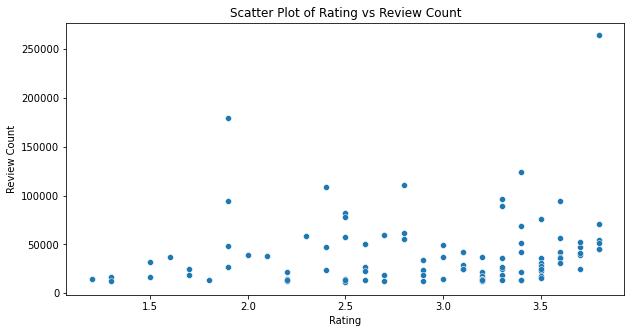

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rating', y='review_count', data=df, palette='BuGn')
plt.title('Scatter Plot of Rating vs Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

In [48]:
genre_count_dict = defaultdict(int)

for i in df['genre']:
    genres = ast.literal_eval(i)
    for genre in genres:
        genre_count_dict[genre] += 1


defaultdict(<class 'int'>, {'Comedy': 51, 'Sci-Fi': 18, 'Horror': 26, 'Thriller': 15, 'Family': 14, 'Romance': 11, 'Action': 33, 'Adventure': 28, 'Fantasy': 16, 'Crime': 10, 'Musical': 2, 'Animation': 2, 'Drama': 10, 'Music': 3, 'Mystery': 7, 'Sport': 4})


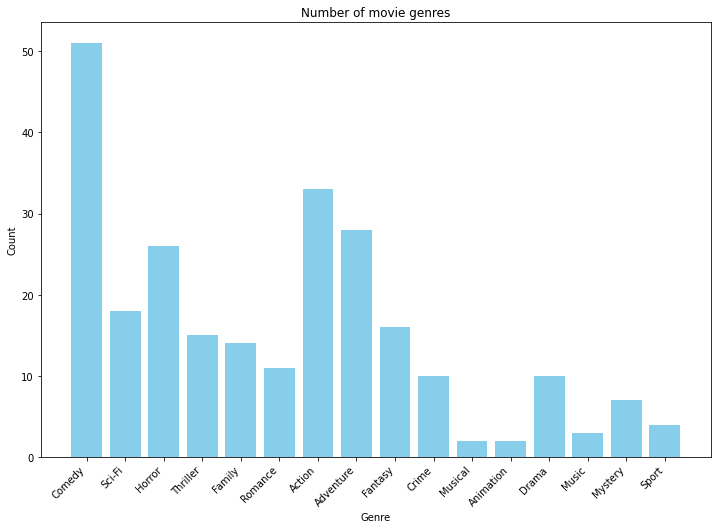

In [51]:
genres, counts = zip(*genre_count_dict.items())
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='skyblue')
plt.title('Number of movie genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [54]:
actor_count_dict=defaultdict(int)
for i in df['stars']:
    star = ast.literal_eval(i)
    for j in star:
        actor_count_dict[j] +=1 

In [59]:
max_actor, max_count = max(actor_count_dict.items(), key=lambda x: x[1])
print(f"The actor with the maximum count is {max_actor} with {max_count} appearances.")


The actor with the maximum count is Fred Willard with 3 appearances.
